In [39]:
%matplotlib inline
import os, subprocess
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def read_frame(filename, timestamp, w=1920, h=1080, extra_cmd=[]):
    cmd = (['ffmpeg',  '-i', filename, '-ss', str(timestamp), '-vframes', '1'] + extra_cmd +
           ['-f', 'rawvideo', '-pix_fmt', 'yuv420p10le', '-'])
    out = subprocess.run(cmd, stdout=subprocess.PIPE, check=True)
    len_y = w*h*2
    len_uv = len_y//4
    y = np.frombuffer(out.stdout[:len_y], dtype='int16').reshape(h,w)
    u = np.frombuffer(out.stdout[len_y:-len_uv], dtype='int16').reshape(h//2,w//2)
    v = np.frombuffer(out.stdout[-len_uv:], dtype='int16').reshape(h//2,w//2)
    return (y, u, v)

## Auslesen von frame 864 (=0:00:36) mit verschiedenen Denoisern

In [131]:
y1, cb1, cr1 = read_frame('Pete Fire Hand.MP4', 36)
y2, cb2, cr2 = read_frame('Pete Fire Hand.MP4', 36, extra_cmd=['-vf','hqdn3d'])
y3, cb3, cr3 = read_frame('Pete Fire Hand.MP4', 36, extra_cmd=['-vf','atadenoise=s=5'])

## Ausmaß der Differenzen

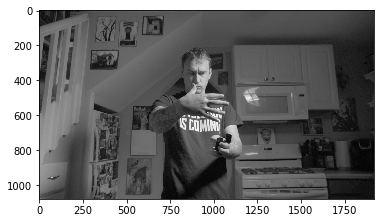

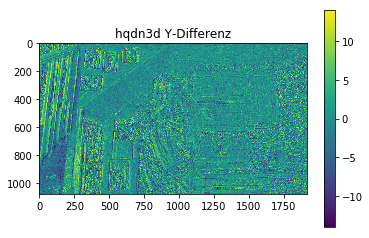

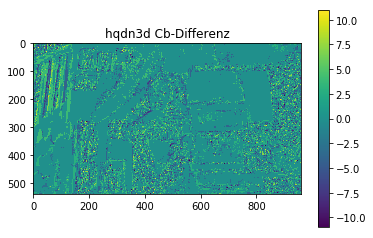

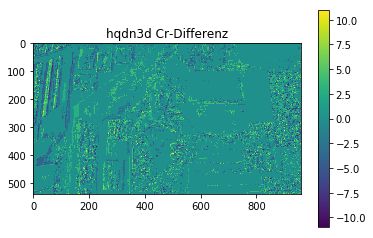

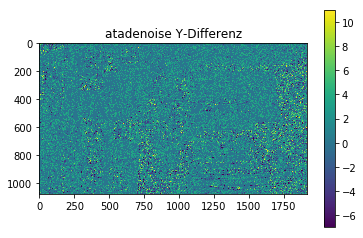

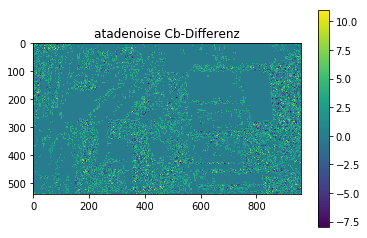

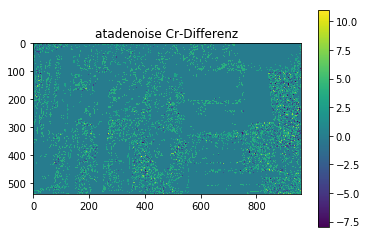

In [132]:
plt.imshow(y1, cmap='gray')
plt.show()

plt.imshow(y1-y2)
plt.colorbar()
plt.title("hqdn3d Y-Differenz")
plt.show()
plt.imshow(cb1-cb2)
plt.colorbar()
plt.title("hqdn3d Cb-Differenz")
plt.show()
plt.imshow(cr1-cr2)
plt.colorbar()
plt.title("hqdn3d Cr-Differenz")
plt.show()

plt.imshow(y1-y3)
plt.colorbar()
plt.title("atadenoise Y-Differenz")
plt.show()
plt.imshow(cb1-cb3)
plt.colorbar()
plt.title("atadenoise Cb-Differenz")
plt.show()
plt.imshow(cr1-cr3)
plt.colorbar()
plt.title("atadenoise Cr-Differenz")
plt.show()

## Häufigkeit der Werte im Werteraster

In [133]:
print("--- Y ---")
print("roh:       ", np.unique(np.fmod(y1, 4), return_counts=True))
print("hqdn3d:    ", np.unique(np.fmod(y2, 4), return_counts=True))
print("atadenoise:", np.unique(np.fmod(y3, 4), return_counts=True))
print("--- Cb ---")
print("roh:       ", np.unique(np.fmod(cb1, 4), return_counts=True))
print("hqdn3d:    ", np.unique(np.fmod(cb2, 4), return_counts=True))
print("atadenoise:", np.unique(np.fmod(cb3, 4), return_counts=True))
print("--- Cr ---")
print("roh:       ", np.unique(np.fmod(cr1, 4), return_counts=True))
print("hqdn3d:    ", np.unique(np.fmod(cr2, 4), return_counts=True))
print("atadenoise:", np.unique(np.fmod(cr3, 4), return_counts=True))

--- Y ---
roh:        (array([0, 1, 2, 3], dtype=int16), array([456220, 484134, 554905, 578341]))
hqdn3d:     (array([0, 1, 2, 3], dtype=int16), array([459894, 473874, 549205, 590627]))
atadenoise: (array([0, 1, 2, 3], dtype=int16), array([463583, 481212, 546184, 582621]))
--- Cb ---
roh:        (array([0, 1, 2, 3], dtype=int16), array([ 95066, 366313,  29546,  27475]))
hqdn3d:     (array([0, 1, 2, 3], dtype=int16), array([ 79192, 386507,  28385,  24316]))
atadenoise: (array([0, 1, 2, 3], dtype=int16), array([ 74957, 387170,  32516,  23757]))
--- Cr ---
roh:        (array([0, 1, 2, 3], dtype=int16), array([353080, 113281,  20742,  31297]))
hqdn3d:     (array([0, 1, 2, 3], dtype=int16), array([353920, 111637,  21738,  31105]))
atadenoise: (array([0, 1, 2, 3], dtype=int16), array([335191, 135668,  19910,  27631]))


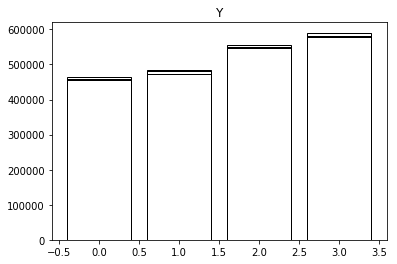

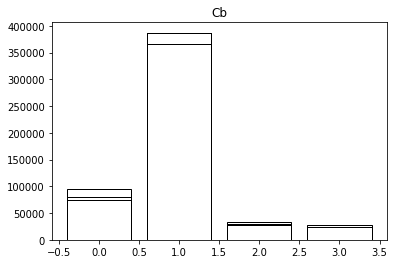

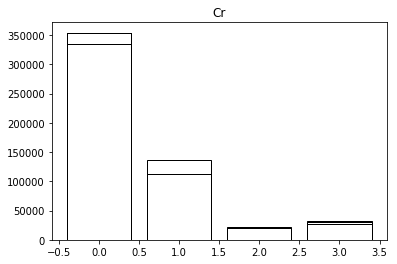

In [135]:
plt.title('Y')
v, fr = np.unique(np.fmod(y1, 4), return_counts=True)
plt.bar(v, fr, fill=False)
v, fr = np.unique(np.fmod(y2, 4), return_counts=True)
plt.bar(v, fr, fill=False)
v, fr = np.unique(np.fmod(y3, 4), return_counts=True)
plt.bar(v, fr, fill=False)
plt.show()

plt.title('Cb')
v, fr = np.unique(np.fmod(cb1, 4), return_counts=True)
plt.bar(v, fr, fill=False)
v, fr = np.unique(np.fmod(cb2, 4), return_counts=True)
plt.bar(v, fr, fill=False)
v, fr = np.unique(np.fmod(cb3, 4), return_counts=True)
plt.bar(v, fr, fill=False)
plt.show()

plt.title('Cr')
v, fr = np.unique(np.fmod(cr1, 4), return_counts=True)
plt.bar(v, fr, fill=False)
v, fr = np.unique(np.fmod(cr2, 4), return_counts=True)
plt.bar(v, fr, fill=False)
v, fr = np.unique(np.fmod(cr3, 4), return_counts=True)
plt.bar(v, fr, fill=False)
plt.show()


## Anzahl der tatsächlich genutzten Werte in jedem Kanal

In [145]:
print("             Y   Cb Cr")
print("roh:        ", len(np.unique(y1)), len(np.unique(cb1)), len(np.unique(cr1)))
print("hqdn3d:     ", len(np.unique(y2)), len(np.unique(cb2)), len(np.unique(cr2)))
print("atadenoise: ", len(np.unique(y3)), len(np.unique(cb3)), len(np.unique(cr3)))

             Y   Cb Cr
roh:         157 38 24
hqdn3d:      153 37 23
atadenoise:  156 41 24


In [149]:
print("\n--- roh ---")
print("Y:\n", np.unique(y1), "\nCb:\n", np.unique(cb1), "\nCr:\n", np.unique(cr1))
print("\n--- hqdn3d ---")
print("Y:\n", np.unique(y2), "\nCb:\n", np.unique(cb2), "\nCr:\n", np.unique(cr2))
print("\n--- atadenaoise ---")
print("Y:\n", np.unique(y3), "\nCb:\n", np.unique(cb3), "\nCr:\n", np.unique(cr3))



--- roh ---
Y:
 [171 174 177 181 184 188 191 195 198 201 205 208 212 215 219 222 225 229
 232 236 239 243 246 250 253 256 260 263 267 270 274 277 280 284 287 291
 294 298 301 304 308 311 315 318 322 325 329 332 335 339 342 346 349 353
 356 359 363 366 370 373 377 380 383 387 390 394 397 401 404 408 411 414
 418 421 425 428 432 435 438 442 445 449 452 456 459 463 466 469 473 476
 480 483 487 490 493 497 500 504 507 511 514 517 521 524 528 531 535 538
 542 545 548 552 555 559 562 566 569 572 576 579 583 586 590 593 596 600
 603 607 610 614 617 621 624 627 631 634 638 641 645 648 651 655 658 662
 665 669 672 675 679 682 686 689 693 696 700 703 710] 
Cb:
 [400 403 407 410 417 421 424 431 435 438 442 445 449 452 456 459 463 466
 470 473 477 480 484 487 491 494 498 501 505 509 512 516 519 523 526 530
 533 537] 
Cr:
 [491 494 498 501 505 509 512 516 519 523 526 530 533 537 540 544 547 551
 554 558 561 565 568 572]

--- hqdn3d ---
Y:
 [181 184 188 191 195 198 201 205 208 212 215 219 222 225 2